In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("bike_sharing_data.txt")
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0.5, 1.0, 'profit in 1000 vs city of population in  10000$')

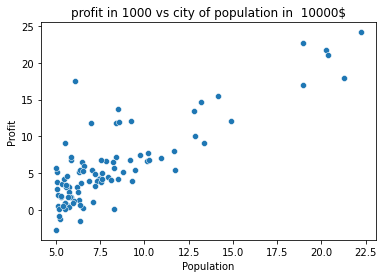

In [4]:
ax = sns.scatterplot(x='Population',y='Profit' ,data=data)
ax.set_title("profit in 1000 vs city of population in  10000$")

In [42]:
def cost_fun(X,y,theta):
  m=len(y)
  y_pred = X.dot(theta)
  error = (y_pred - y)**2
  result = (1/(2*m) * np.sum(error))
  return result

In [43]:
m = data.Population.values.size
X = np.append(np.ones((m,1)),data.Population.values.reshape(m,1),axis=1)
y = data.Profit.values.reshape(m,1)
theta = np.zeros((2,1))
cost_fun(X,y,theta) 

32.072733877455676

In [50]:
def gradient_descent(X,y,theta,alpha,iteration):
  m = len(y)
  costs=[]
  for i in range(iteration):
    y_pred = X.dot(theta)
    error = np.dot(X.transpose(),(y_pred-y))
    theta -= alpha * (1/m) * error
    costs.append(cost_fun(X,y,theta))
  return theta ,costs

In [51]:
theta,costs =gradient_descent(X,y,theta,alpha=0.01,iteration=2000)
print("h(x) = {}  + {}x1".format(str(round(theta[0,0],2)),
                                 str(round(theta[1,0],2))))

h(x) = -3.79  + 1.18x1


In [52]:
from mpl_toolkits.mplot3d import Axes3D 

In [63]:
theta_0 = np.linspace(-10,10,100)
theta_1 = np.linspace(-1,4,100)
cost_values = np.zeros((len(theta_0),len(theta_1)))
for i in range(len(theta_0)):
  for j in range(len(theta_1)):
    t = np.array([theta_0[i],theta_1[j]])
    cost_values[i,j]=cost_fun(X,y,t)


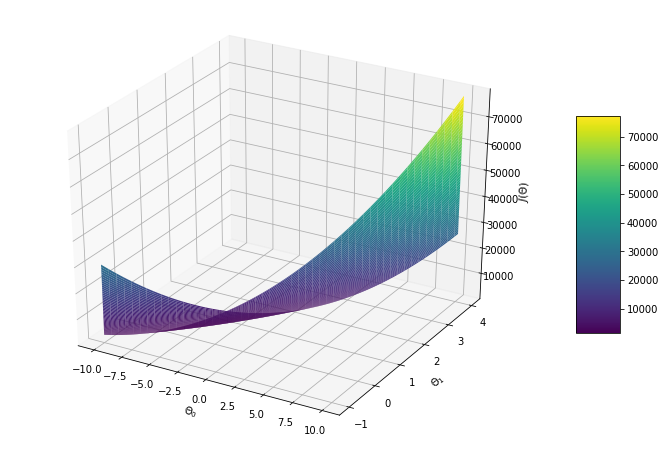

In [67]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(theta_0,theta_1,cost_values,cmap='viridis')
fig.colorbar(surf,shrink = 0.5 ,aspect=5)
plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel('$J(\Theta)$')
ax.view_init(30,300)

Text(0.5, 1.0, 'value of cost function over iteration of Gradent Descent')

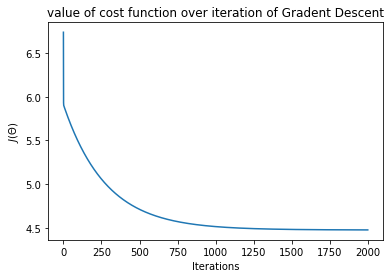

In [68]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("value of cost function over iteration of Gradent Descent")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'linear regression fit')

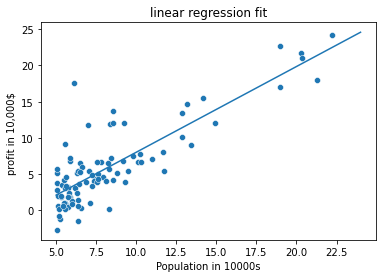

In [69]:
theta = np.squeeze(theta)
x_value = [x for x in range(5,25)]
y_value = [(theta[0]+x*theta[1]) for x in x_value]
sns.scatterplot(x='Population',y='Profit' ,data=data)
sns.lineplot(x_value,y_value)

plt.xlabel('Population in 10000s')
plt.ylabel("profit in 10,000$ ")
plt.title("linear regression fit")

In [73]:
def predict(X,theta):
  y_pred = np.dot(theta.transpose(),X)
  return y_pred

In [81]:
y_pred1 = predict(np.array([1,4]),theta)*10000
print("for population of 40000 people ,the model predict of $" + str(round(y_pred1,0)))

for population of 40000 people ,the model predict of $9408.0


In [80]:
y_pred2 = predict(np.array([1,8.3]),theta)*10000
print("for population of 83000 people ,the model predict of $" + str(round(y_pred2,0)))

for population of 83000 people ,the model predict of $60243.0
